In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the data
data = pd.read_csv(r"C:\sachin\Python\amazon Project\amazon_delivery.csv")

In [3]:
data.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [5]:
data.dtypes

Order_ID            object
Agent_Age            int64
Agent_Rating       float64
Store_Latitude     float64
Store_Longitude    float64
Drop_Latitude      float64
Drop_Longitude     float64
Order_Date          object
Order_Time          object
Pickup_Time         object
Weather             object
Traffic             object
Vehicle             object
Area                object
Delivery_Time        int64
Category            object
dtype: object

### Handling  the missing value 

In [6]:
# Check the missing values 
data.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [7]:
# Filling the missing value
data['Agent_Rating'].fillna(data['Agent_Rating'].mean(), inplace = True)
data['Weather'].fillna(data['Weather'].mode()[0], inplace = True)

C:\Users\Sachin Hembram\AppData\Local\Temp\ipykernel_12520\4263973688.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Agent_Rating'].fillna(data['Agent_Rating'].mean(), inplace = True)
C:\Users\Sachin Hembram\AppData\Local\Temp\ipykernel_12520\4263973688.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [8]:
data.dtypes

Order_ID            object
Agent_Age            int64
Agent_Rating       float64
Store_Latitude     float64
Store_Longitude    float64
Drop_Latitude      float64
Drop_Longitude     float64
Order_Date          object
Order_Time          object
Pickup_Time         object
Weather             object
Traffic             object
Vehicle             object
Area                object
Delivery_Time        int64
Category            object
dtype: object

In [9]:
data.head(3)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports


### Extracting values

In [10]:
# Extracting value from the Order_Date Column
data['Order_Month'] = data['Order_Date'].str[5:7]
data['Order_Day'] = data['Order_Date'].str[8:10]

# Extractin value from the Order_Time Column
data['Order_Hour'] = data['Order_Time'].str[0:2]
data['Order_Minute'] = data['Order_Time'].str[3:5]

# Extracting value from the pickup_Time columns
data['Pickup_Hour'] = data['Pickup_Time'].str[0:2]
data['Pickup_Minute'] = data['Pickup_Time'].str[3:5]

In [11]:
data.columns

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category', 'Order_Month', 'Order_Day', 'Order_Hour',
       'Order_Minute', 'Pickup_Hour', 'Pickup_Minute'],
      dtype='object')

### Dropping the  unneccessary columns 

In [12]:
data.drop(['Order_ID','Order_Date','Order_Time','Pickup_Time'], axis = 1, inplace = True)

In [13]:
data.dtypes

Agent_Age            int64
Agent_Rating       float64
Store_Latitude     float64
Store_Longitude    float64
Drop_Latitude      float64
Drop_Longitude     float64
Weather             object
Traffic             object
Vehicle             object
Area                object
Delivery_Time        int64
Category            object
Order_Month         object
Order_Day           object
Order_Hour          object
Order_Minute        object
Pickup_Hour         object
Pickup_Minute       object
dtype: object

In [14]:
na_count = (data['Order_Hour'] == 'Na').sum()
print("Number of 'Na' values:", na_count)


Number of 'Na' values: 91


In [15]:
data['Order_Hour'].mode()

0    21
Name: Order_Hour, dtype: object

In [16]:
data['Order_Minute'].mode()

0    35
Name: Order_Minute, dtype: object

In [17]:
# Converting the object value to the integer 
data['Order_Month'] = data['Order_Month'].astype(int)
data['Order_Day'] = data['Order_Day'].astype(int)
data['Order_Hour'] = data['Order_Hour'].replace('Na', 19).astype(int)
data['Order_Minute'] = data['Order_Minute'].replace(' ', 35).astype(int)
data['Pickup_Hour'] = data['Pickup_Hour'].astype(int)
data['Pickup_Minute'] = data['Pickup_Minute'].astype(int)

### Check the outlier

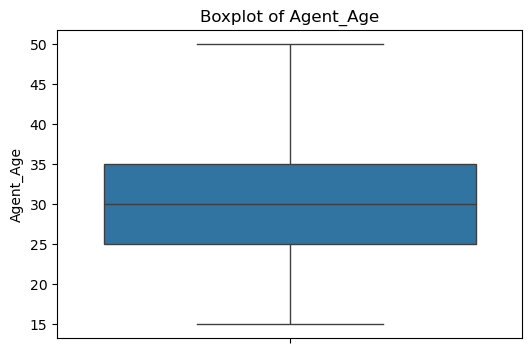

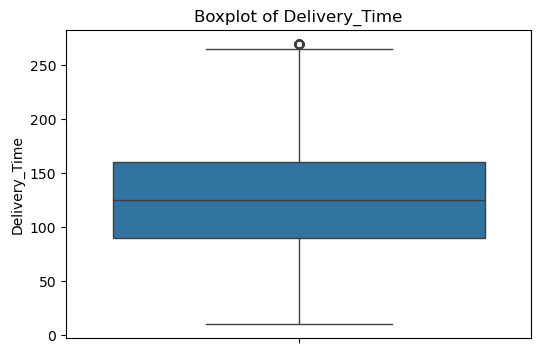

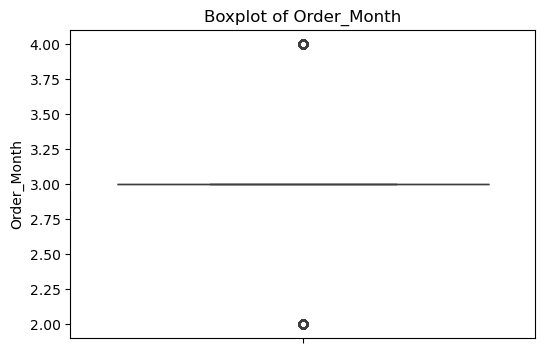

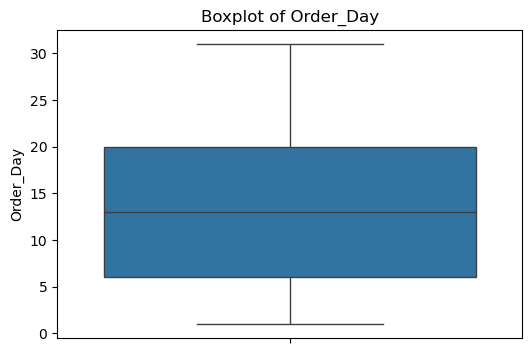

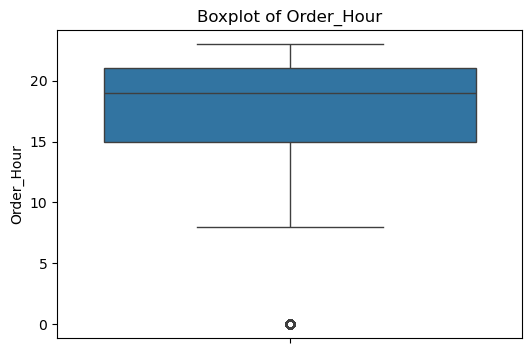

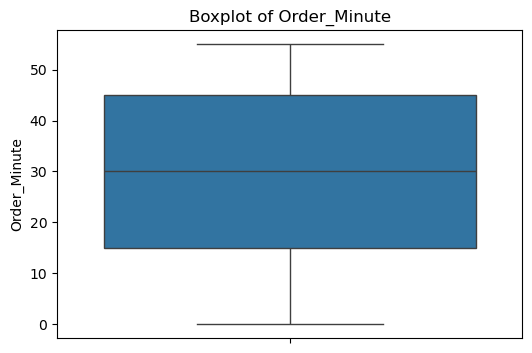

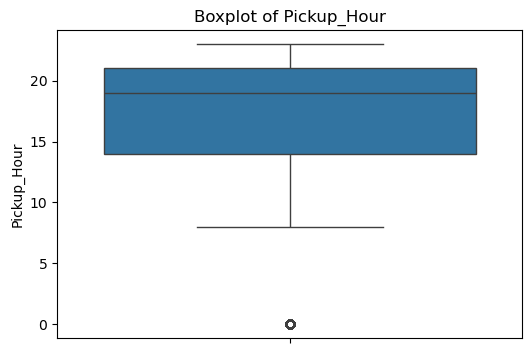

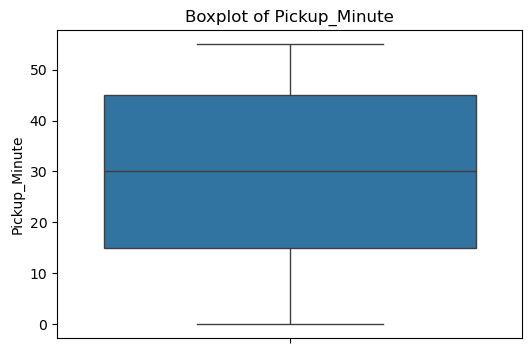

In [18]:
int_columns = data.select_dtypes(include='int').columns

# Create boxplots for each integer column
for col in int_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### Encoding the String columns

In [19]:
data.dtypes

Agent_Age            int64
Agent_Rating       float64
Store_Latitude     float64
Store_Longitude    float64
Drop_Latitude      float64
Drop_Longitude     float64
Weather             object
Traffic             object
Vehicle             object
Area                object
Delivery_Time        int64
Category            object
Order_Month          int32
Order_Day            int32
Order_Hour           int32
Order_Minute         int32
Pickup_Hour          int32
Pickup_Minute        int32
dtype: object

### LabelEncoder

In [20]:
from sklearn.preprocessing import LabelEncoder

la = LabelEncoder()
data['Category'] = la.fit_transform(data['Category'])
data['Weather'] = la.fit_transform(data['Weather'])
data['Traffic'] = la.fit_transform(data['Traffic'])
data['Vehicle'] = la.fit_transform(data['Vehicle'])
data['Area'] = la.fit_transform(data['Area'])

In [21]:
data

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Order_Month,Order_Day,Order_Hour,Order_Minute,Pickup_Hour,Pickup_Minute
0,37,4.9,22.745049,75.892471,22.765049,75.912471,4,0,1,3,120,2,3,19,11,30,11,45
1,34,4.5,12.913041,77.683237,13.043041,77.813237,3,1,2,0,165,4,3,25,19,45,19,50
2,23,4.4,12.914264,77.678400,12.924264,77.688400,2,2,1,3,130,14,3,19,8,30,8,45
3,38,4.7,11.003669,76.976494,11.053669,77.026494,4,3,1,0,105,3,4,5,18,0,18,10
4,32,4.6,12.972793,80.249982,13.012793,80.289982,0,0,2,0,150,15,3,26,13,30,13,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,30,4.8,26.902328,75.794257,26.912328,75.804257,5,0,1,0,160,6,3,24,11,35,11,45
43735,21,4.6,0.000000,0.000000,0.070000,0.070000,5,1,1,0,180,7,2,16,19,55,20,10
43736,30,4.9,13.022394,80.242439,13.052394,80.272439,0,2,2,0,80,6,3,11,23,50,0,5
43737,20,4.7,11.001753,76.986241,11.041753,77.026241,0,0,1,0,130,8,3,7,13,35,13,40


In [22]:
data.columns

Index(['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude',
       'Drop_Latitude', 'Drop_Longitude', 'Weather', 'Traffic', 'Vehicle',
       'Area', 'Delivery_Time', 'Category', 'Order_Month', 'Order_Day',
       'Order_Hour', 'Order_Minute', 'Pickup_Hour', 'Pickup_Minute'],
      dtype='object')

### Save the feature and target column

In [23]:
X = data.drop('Delivery_Time', axis=1)  # All columns except target
y = data['Delivery_Time']               # Only the target column

### StandardScaler

In [24]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the feature columns
X_scaled = scaler.fit_transform(X)  # Scales all feature columns at once

### Train_test_split 

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X_scaled,y, test_size = 0.2, random_state = 42)

### Ramdom Forest Regression model

In [26]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators = 100, random_state =42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [27]:
from sklearn.metrics import r2_score

# Checking the R² score
r2 = r2_score(y_test, rf_model.predict(X_test))
print(f"R-squared Score: {r2:.4f}")

R-squared Score: 0.7350


In [29]:
r2_percentage = r2 * 100
print(f"R-squared Score: {r2_percentage:.2f}%")

R-squared Score: 73.50%


### DcisionTreeRegressor model

In [30]:
from sklearn.tree import DecisionTreeRegressor 

tree_model = DecisionTreeRegressor(random_state = 42)

tree_model.fit(X_train,y_train)


DecisionTreeRegressor(random_state=42)

In [31]:
# Making predictions on the test set
y_pred = tree_model.predict(X_test)

# Calculating R² score
r2 = r2_score(y_test, y_pred)

# Displaying the result in percentage form
print(f"R-squared Score: {r2 * 100:.2f}%")

R-squared Score: 50.28%


### XGBoot Regression model

In [32]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators =100, learning_rate = 0.1, max_depth = 4, random_state = 42)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [33]:
# Making predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculating R² score
r2 = r2_score(y_test, y_pred)

# Displaying the result in percentage form
print(f"R-squared Score: {r2 * 100:.2f}%")

R-squared Score: 74.50%


### Linear Regression model

In [36]:
# from sklearn.linear_model import LinearRegression

# # Creating and training the Linear Regression model
# lr_model = LinearRegression()
# lr_model.fit(X_train, y_train)


In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Apply polynomial transformation
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)  # Fit & transform training data
X_test_poly = poly.transform(X_test)        # Transform test data (without fitting again)

# Create and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_poly, y_train)  # Train on transformed features

# Make predictions
y_pred = lr_model.predict(X_test_poly)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print results
print(f"R-squared Score: {r2 * 100:.2f}%")
print(f"Mean Squared Error: {mse:.4f}")

R-squared Score: 37.99%
Mean Squared Error: 1651.8433


### Ridge Regression model

In [35]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha = 1.0)

ridge_model.fit(X_train, y_train)

Ridge()

In [36]:
# Making predictions on the test set
y_pred = ridge_model.predict(X_test)

# Calculating R² score
r2 = r2_score(y_test, y_pred)

# Displaying the result in percentage form
print(f"R-squared Score: {r2 * 100:.2f}%")

R-squared Score: 24.38%


### Lasso Regression model

In [37]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 1.0)
lasso_model.fit(X_train, y_train)

Lasso()

In [38]:
# Making predictions on the test set
y_pred = lasso_model.predict(X_test)

# Calculating R² score
r2 = r2_score(y_test, y_pred)

# Displaying the result in percentage form
print(f"R-squared Score: {r2 * 100:.2f}%")

R-squared Score: 24.15%


### Elastic net Regression model

In [39]:
from sklearn.linear_model import ElasticNet 
elastic_model = ElasticNet(alpha = 1.0, l1_ratio=0.5)
elastic_model.fit(X_train, y_train)

ElasticNet()

In [40]:
# Making predictions
y_pred = elastic_model.predict(X_test)

# Calculating scores
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Printing results
print(f"R-squared Score: {r2 * 100:.2f}%")
print(f"Mean Squared Error: {mse:.4f}")

R-squared Score: 21.85%
Mean Squared Error: 2081.7516


### Bayesian regression model

In [41]:
from sklearn.linear_model import BayesianRidge
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)

BayesianRidge()

In [42]:
b_pred = bayesian_model.predict(X_test)

In [43]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, b_pred)

# Printing results
print(f"R-squared Score: {r2 * 100:.2f}%")
print(f"Mean Squared Error: {mse:.4f}")



R-squared Score: 21.85%
Mean Squared Error: 2014.3810


## Ml flow 

In [45]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import mean_squared_error, r2_score

# Start a tracking experiment
mlflow.set_experiment("Amazon Delivery Time Regression")

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    with mlflow.start_run(run_name=name):
        # Fit model
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)

        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        # Log params (if applicable)
        if hasattr(model, 'get_params'):
            mlflow.log_params(model.get_params())

        # Log metrics
        mlflow.log_metric("R2", r2)
        mlflow.log_metric("MSE", mse)

        # Log model
        mlflow.sklearn.log_model(model, f"{name}_model")

        print(f"{name} - R2: {r2:.4f}, MSE: {mse:.4f}")


2025/06/13 18:56:53 INFO mlflow.tracking.fluent: Experiment with name 'Amazon Delivery Time Regression' does not exist. Creating a new experiment.


In [ ]:
evaluate_model("RandomForest", rf_model, X_train, y_train, X_test, y_test)
evaluate_model("DecisionTree", tree_model, X_train, y_train, X_test, y_test)
evaluate_model("XGBoost", xgb_model, X_train, y_train, X_test, y_test)
evaluate_model("Ridge", ridge_model, X_train, y_train, X_test, y_test)
evaluate_model("Lasso", lasso_model, X_train, y_train, X_test, y_test)
evaluate_model("ElasticNet", elastic_model, X_train, y_train, X_test, y_test)
evaluate_model("BayesianRidge", bayesian_model, X_train, y_train, X_test, y_test)


### Distribution of delivery times.

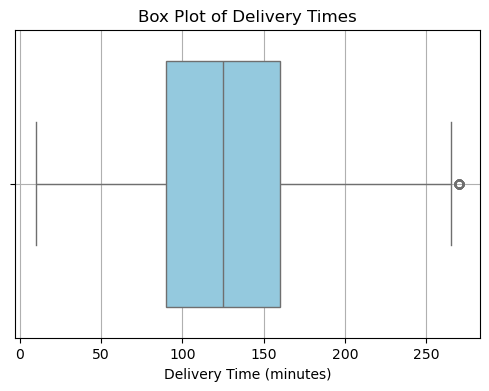

In [47]:
# Creating a box plot for delivery times
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['Delivery_Time'], color="skyblue")

# Labels and title
plt.title("Box Plot of Delivery Times")
plt.xlabel("Delivery Time (minutes)")
plt.grid(True)

# Show plot
plt.show()


### Impact of weather and traffic on delivery times.

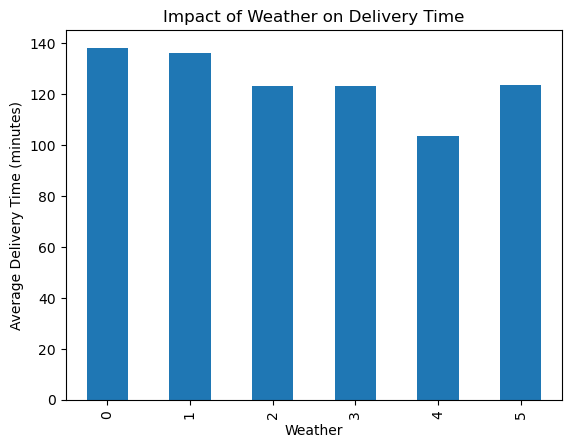

In [48]:
data.groupby('Weather')['Delivery_Time'].mean().plot(kind='bar')
plt.title("Impact of Weather on Delivery Time")
plt.ylabel("Average Delivery Time (minutes)")
plt.show()

### Relationship between distance and delivery time.

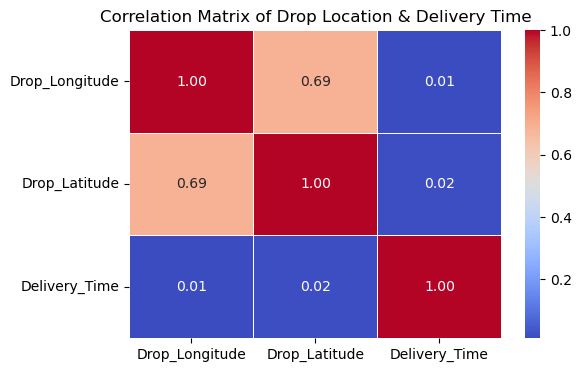

In [50]:
corr_matrix = data[['Drop_Longitude', 'Drop_Latitude', 'Delivery_Time']].corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set title
plt.title("Correlation Matrix of Drop Location & Delivery Time")
plt.show()



### Distribution of delivery times.

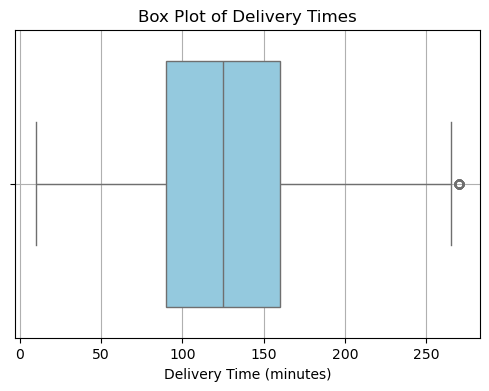

In [ ]:
# Creating a box plot for delivery times
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['Delivery_Time'], color="skyblue")

# Labels and title
plt.title("Box Plot of Delivery Times")
plt.xlabel("Delivery Time (minutes)")
plt.grid(True)

# Show plot
plt.show()


### Agent performance across various conditions.

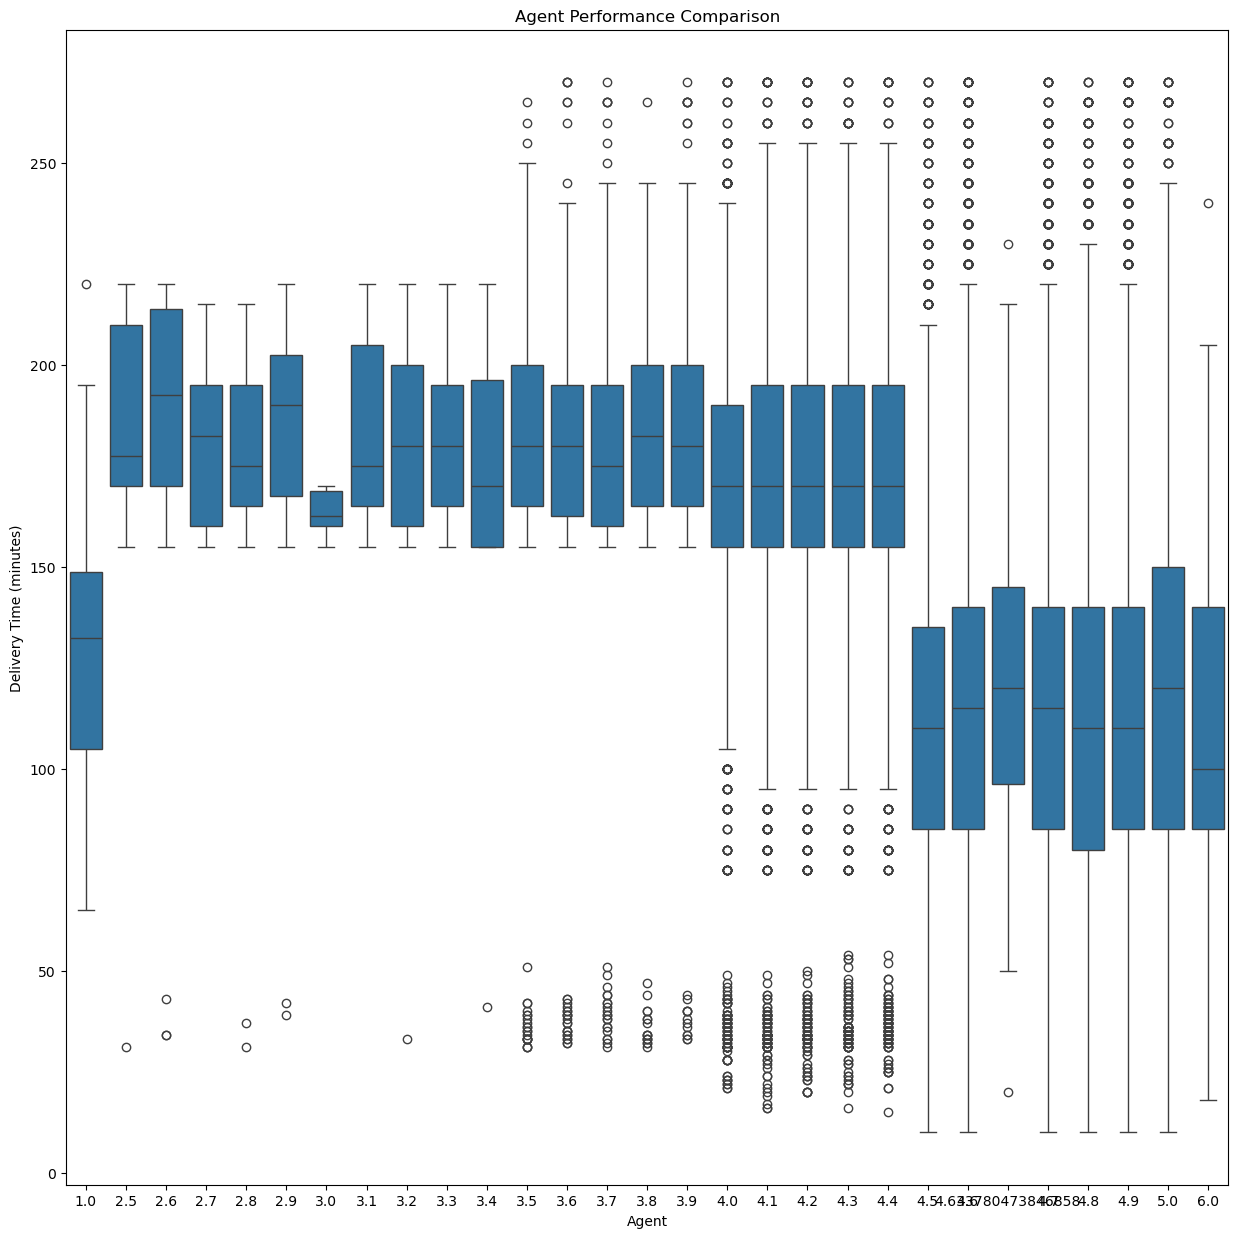

In [ ]:
plt.figure(figsize=(15, 15))
sns.boxplot(x=data['Agent_Rating'], y=data['Delivery_Time'])
plt.title("Agent Performance Comparison")
plt.xlabel("Agent")
plt.ylabel("Delivery Time (minutes)")
plt.show()